In [58]:
import torch
import torchvision
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import torch.nn.init

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as image

In [59]:
transform = transforms.ToTensor()

In [60]:
train_mnist = dsets.MNIST(root='./data', train=True, download=True, transform=transform)
test_mnist = dsets.MNIST(root='./data', train=False, download=True, transform=transform)

In [61]:
print('train length : %d'%len(train_mnist))
print('test length : %d'%len(test_mnist))

train length : 60000
test length : 10000


In [62]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.optim.lr_scheduler import StepLR

In [63]:
learning_rate = 0.001
training_epochs = 15
batch_size = 100

In [64]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(train_mnist, batch_size=batch_size, shuffle=True, drop_last=True)
test_dataloader = DataLoader(test_mnist, batch_size=batch_size, shuffle=True, drop_last=True)

In [65]:
class CNN(nn.Module) :

    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.dropout1 = nn.Dropout(0.25)
        self.dropout2 = nn.Dropout(0.5)
        self.fc1 = nn.Linear(9216, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        x = self.dropout1(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.dropout2(x)
        x = self.fc2(x)
        output = F.log_softmax(x, dim=1)
        return output


In [66]:
class CNN2(nn.Module):

    def __init__(self):
        super(CNN2, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1)
        self.pool = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.fc1 = nn.Linear(1600, 128)
        self.fc2 = nn.Linear(128, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.pool(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = self.pool(x)
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [80]:
class CNN3(nn.Module):

    def __init__(self):
        super(CNN3, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 5, 1)
        self.pool = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(32, 64, 5, 1)
        self.fc1 = nn.Linear(1024, 128)
        self.fc2 = nn.Linear(128, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.pool(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = self.pool(x)
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


In [67]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

torch.manual_seed(777)

if device=='cuda':
    torch.cuda.manual_seed_all(777)

model = CNN()

In [68]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [69]:
### training

training_batch = len(train_dataloader)

for epoch in range(training_epochs):
    avg_loss = 0
    step = 0

    for inputs, labels in train_dataloader:

        inputs = inputs.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        avg_loss += loss/training_batch
        step += 1

    if step % 10 == 0:
        print('step : %d'%step)
    print('[Epoch: {:>4}] cost = {:>.9}'.format(epoch + 1, avg_loss))



KeyboardInterrupt: 

In [ ]:
avg_loss_test = 0
test_batch = len(test_dataloader)
total = 0
correct = 0

with torch.no_grad():
    for inputs_test, labels_test in test_dataloader:

        inputs_test = inputs_test.to(device)
        labels_test = labels_test.to(device)
        outputs_test = model(inputs_test)

        loss_test = criterion(outputs_test, labels_test)
        avg_loss_test+= loss_test/test_batch

        _, predicted = torch.max(outputs_test.data, 1)
        for label, prediction in zip(labels_test, predicted):
            if label == prediction:
                correct += 1
            total += 1

accuracy = 0
if total != 0:
    accuracy = correct / total

In [ ]:
print('test loss : %f'%avg_loss_test)
print('accuracy : %f'%accuracy)


In [ ]:
model2 = CNN2()
criterion = nn.CrossEntropyLoss()
optimizer2 = torch.optim.Adam(model2.parameters(), lr=learning_rate)

In [ ]:
training_batch = len(train_dataloader)

for epoch in range(training_epochs):
    avg_loss = 0
    step = 0

    for inputs, labels in train_dataloader:

        inputs = inputs.to(device)
        labels = labels.to(device)

        optimizer2.zero_grad()

        outputs = model2(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer2.step()

        avg_loss += loss/training_batch
        step += 1

    if step % 10 == 0:
        print('step : %d'%step)
    print('[Epoch: {:>4}] cost = {:>.9}'.format(epoch + 1, avg_loss))


In [ ]:
avg_loss_test = 0
test_batch = len(test_dataloader)
total = 0
correct = 0

with torch.no_grad():
    for inputs_test, labels_test in test_dataloader:

        inputs_test = inputs_test.to(device)
        labels_test = labels_test.to(device)
        outputs_test = model2(inputs_test)

        loss_test = criterion(outputs_test, labels_test)
        avg_loss_test+= loss_test/test_batch

        _, predicted = torch.max(outputs_test.data, 1)
        for label, prediction in zip(labels_test, predicted):
            if label == prediction:
                correct += 1
            total += 1

accuracy = 0
if total != 0:
    accuracy = correct / total


print('test2 loss : %f'%avg_loss_test)
print('accuracy2 : %f'%accuracy)


torch.Size([3, 392, 242])


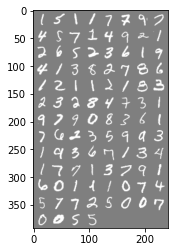

    1     5     1     1     7     7     9     7     4     5     7     1     4     9     2     1     2     6     5     2     3     6     1     9     4     1     3     8     2     7     8     6     1     2     1     1     2     1     8     3     2     3     2     8     4     7     3     1     9     7     9     0     8     3     6     1     7     6     2     3     5     9     9     3     1     9     3     6     7     1     3     4     1     7     7     1     3     7     9     1     6     0     1     1     1     0     7     4     5     7     7     2     5     0     0     7     0     0     5     5


In [77]:

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    print(img.size())
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(train_dataloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % labels[j].item() for j in range(batch_size)))

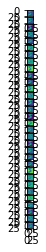

In [75]:
# Visualize feature maps
activation = {}
def get_activation(name):
    def hook(model, input, output):
        activation[name] = output.detach()
    return hook

model.conv1.register_forward_hook(get_activation('conv1'))
data, _ = train_mnist[0]
data.unsqueeze_(0)
output = model(data)

act = activation['conv1'].squeeze()
fig, axarr = plt.subplots(act.size(0))
for idx in range(act.size(0)):
    axarr[idx].imshow(act[idx])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

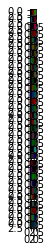

In [79]:
kernels = model2.conv1.weight.detach()
fig, axarr = plt.subplots(kernels.size(0))
for idx in range(kernels.size(0)):
    axarr[idx].imshow(kernels[idx].squeeze())

actual number : [8 3 7 1 2 5 6 0 7 9]
Prediction number: [8 3 7 1 2 5 6 0 7 9]
torch.Size([3, 28, 28])


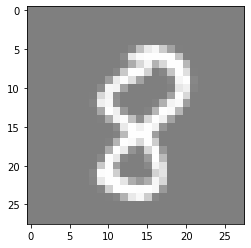

torch.Size([3, 28, 28])


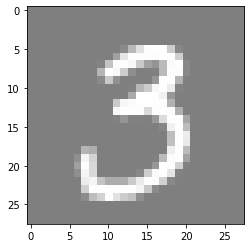

torch.Size([3, 28, 28])


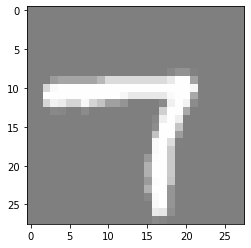

torch.Size([3, 28, 28])


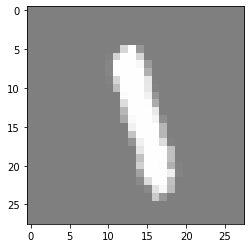

torch.Size([3, 28, 28])


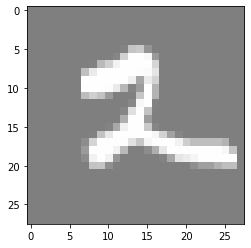

torch.Size([3, 28, 28])


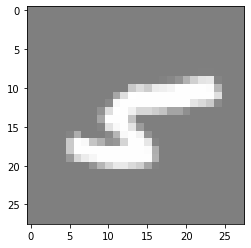

torch.Size([3, 28, 28])


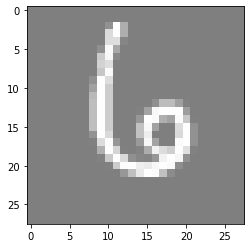

torch.Size([3, 28, 28])


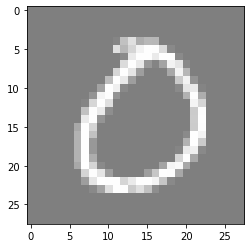

torch.Size([3, 28, 28])


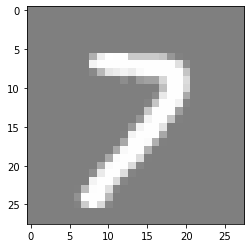

torch.Size([3, 28, 28])


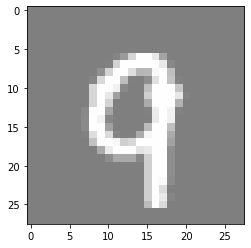

Actual number: [8 3 7 1 2 5 6 0 7 9]


In [78]:
sample = next(iter(test_dataloader))
imgs, lbls = sample
actual_number = lbls[:10].numpy()
print('actual number :', actual_number)
test_output = model2(imgs[:10])
pred_y = torch.max(test_output, 1)[1].data.numpy().squeeze()
print(f'Prediction number: {pred_y}')
for img in imgs[:10]:
    imshow(torchvision.utils.make_grid(img))
print(f'Actual number: {actual_number}')

In [82]:
model3 = CNN3()
criterion = nn.CrossEntropyLoss()
optimizer3 = torch.optim.Adam(model3.parameters(), lr=learning_rate)

In [84]:
training_batch = len(train_dataloader)

for epoch in range(training_epochs):
    avg_loss = 0
    step = 0

    for inputs, labels in train_dataloader:

        inputs = inputs.to(device)
        labels = labels.to(device)

        optimizer3.zero_grad()

        outputs = model3(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer3.step()

        avg_loss += loss/training_batch
        step += 1

    if step % 10 == 0:
        print('step : %d'%step)
    print('[Epoch: {:>4}] cost = {:>.9}'.format(epoch + 1, avg_loss))

step : 600
[Epoch:    1] cost = 1.29182291
step : 600
[Epoch:    2] cost = 1.07746136
step : 600
[Epoch:    3] cost = 0.976007998
step : 600
[Epoch:    4] cost = 0.914544463
step : 600
[Epoch:    5] cost = 0.869579315
step : 600
[Epoch:    6] cost = 0.831139147
step : 600
[Epoch:    7] cost = 0.794126928
step : 600
[Epoch:    8] cost = 0.757756233
step : 600
[Epoch:    9] cost = 0.720745623
step : 600
[Epoch:   10] cost = 0.682279825
step : 600
[Epoch:   11] cost = 0.640150905
step : 600
[Epoch:   12] cost = 0.599014163
step : 600
[Epoch:   13] cost = 0.557597697
step : 600
[Epoch:   14] cost = 0.516204059
step : 600
[Epoch:   15] cost = 0.479683012


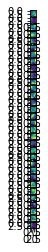

In [85]:
kernels = model3.conv1.weight.detach()
fig, axarr = plt.subplots(kernels.size(0))
for idx in range(kernels.size(0)):
    axarr[idx].imshow(kernels[idx].squeeze())

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


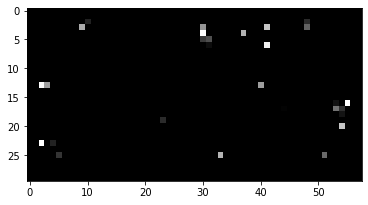

In [86]:
img = torchvision.utils.make_grid(kernels)
plt.imshow(img.permute(1, 2, 0))